In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
df=pd.read_csv("kmeans.csv")

In [17]:
c1=[df['x'][0],df['y'][0]]
c2=[df['x'][1],df['y'][1]]
c3=[df['x'][2],df['y'][2]]
df['C1'] = 0.0
df['C2'] = 0.0
df['C3'] = 0.0
df['Cluster']="0"
df

,id,x,y,C1,C2,C3,Cluster
0,A1,2,10,0.0,0.0,0.0,0
1,A2,2,5,0.0,0.0,0.0,0
2,A3,8,4,0.0,0.0,0.0,0
3,B1,5,8,0.0,0.0,0.0,0
4,B2,7,5,0.0,0.0,0.0,0
5,B3,6,4,0.0,0.0,0.0,0
6,C1,1,2,0.0,0.0,0.0,0
7,C2,4,9,0.0,0.0,0.0,0


In [18]:
def dis(x1,x2,y1,y2):
    return ((x1-x2)**2+(y1-y2)**2)**0.5

In [19]:
i=0
for x in df.values:
    
    df.loc[i, 'C1'] = dis(x[1], c1[0], x[2], c1[1])
    df.loc[i, 'C2'] = dis(x[1], c2[0], x[2], c2[1])
    df.loc[i, 'C3'] = dis(x[1], c3[0], x[2], c3[1])
    s=min(df.loc[i, 'C1'],df.loc[i, 'C2'],df.loc[i, 'C3'])    
    d={df.loc[i, 'C1']:'C1',df.loc[i, 'C2']:'C2',df.loc[i, 'C3']:'C3'}
    df.loc[i, 'Cluster']=d[s]
    i+=1
df

,id,x,y,C1,C2,C3,Cluster
0,A1,2,10,0.000000,5.000000,8.485281,C1
1,A2,2,5,5.000000,0.000000,6.082763,C2
2,A3,8,4,8.485281,6.082763,0.000000,C3
3,B1,5,8,3.605551,4.242641,5.000000,C1
4,B2,7,5,7.071068,5.000000,1.414214,C3
5,B3,6,4,7.211103,4.123106,2.000000,C3
6,C1,1,2,8.062258,3.162278,7.280110,C2
7,C2,4,9,2.236068,4.472136,6.403124,C1


In [20]:
c= df.groupby('Cluster')[['x', 'y']].mean().reset_index()
c1=[c['x'][0],c['y'][0]]
c2=[c['x'][1],c['y'][1]]
c3=[c['x'][2],c['y'][2]]

In [21]:
i=0
for x in df.values:
    df.loc[i, 'C1'] = dis(x[1], c1[0], x[2], c1[1])
    df.loc[i, 'C2'] = dis(x[1], c2[0], x[2], c2[1])
    df.loc[i, 'C3'] = dis(x[1], c3[0], x[2], c3[1])
    s=min(df.loc[i, 'C1'],df.loc[i, 'C2'],df.loc[i, 'C3'])    
    d={df.loc[i, 'C1']:'C1',df.loc[i, 'C2']:'C2',df.loc[i, 'C3']:'C3'}
    df.loc[i, 'Cluster']=d[s]
    i+=1
df_=df
df_

,id,x,y,C1,C2,C3,Cluster
0,A1,2,10,1.943651,6.519202,7.557189,C1
1,A2,2,5,4.333333,1.581139,5.044249,C2
2,A3,8,4,6.616478,6.519202,1.054093,C3
3,B1,5,8,1.666667,5.700877,4.176655,C1
4,B2,7,5,5.206833,5.700877,0.666667,C3
5,B3,6,4,5.517648,4.527693,1.054093,C3
6,C1,1,2,7.490735,1.581139,6.437736,C2
7,C2,4,9,0.333333,6.041523,5.547772,C1


In [22]:
print(df_.equals(df))
c= df.groupby('Cluster')[['x', 'y']].mean().reset_index()
c1=[c['x'][0],c['y'][0]]
c2=[c['x'][1],c['y'][1]]
c3=[c['x'][2],c['y'][2]]
c=np.array([c1,c2,c3])

True


In [23]:
df['Cluster'] = df['Cluster'].replace({'C1': 0, 'C2': 1, 'C3': 2})

In [24]:
df

,id,x,y,C1,C2,C3,Cluster
0,A1,2,10,1.943651,6.519202,7.557189,0
1,A2,2,5,4.333333,1.581139,5.044249,1
2,A3,8,4,6.616478,6.519202,1.054093,2
3,B1,5,8,1.666667,5.700877,4.176655,0
4,B2,7,5,5.206833,5.700877,0.666667,2
5,B3,6,4,5.517648,4.527693,1.054093,2
6,C1,1,2,7.490735,1.581139,6.437736,1
7,C2,4,9,0.333333,6.041523,5.547772,0


In [25]:
new_x, new_y = 5, 3  
d11=dis(new_x, c1[0], new_y, c1[1])
d22=dis(new_x, c2[0], new_y, c2[1])
d33=dis(new_x, c3[0], new_y, c3[1])

print(f"The point ({new_x}, {new_y}) belongs to cluster {predicted_cluster} with centroid {predicted_centroid}")

The point (5, 3) belongs to cluster 0 with centroid [7.         4.33333333]


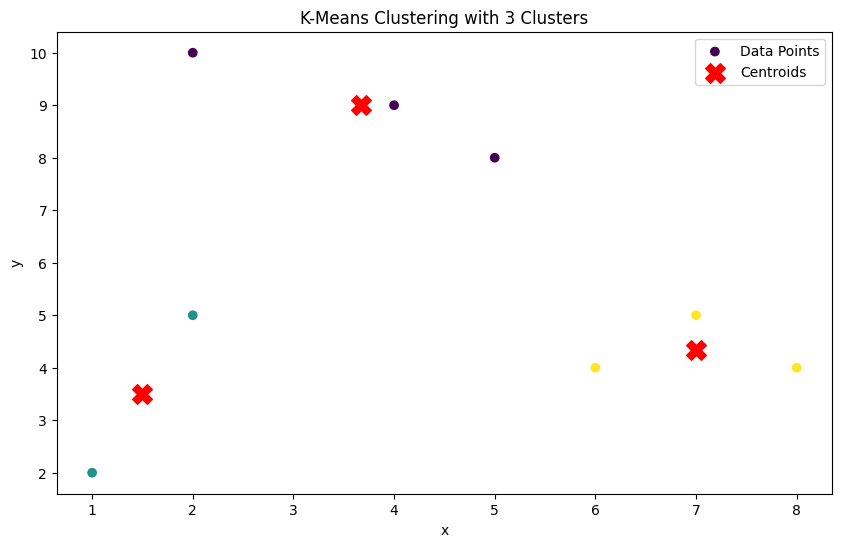

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(df['x'], df['y'], c=df['Cluster'], cmap='viridis', label='Data Points')
plt.scatter(c[:, 0], c[:, 1], color='red', marker='X', s=200, label='Centroids')
plt.scatter(new_x, new_y, color='black', marker='*', s=200, label=f'New Point (Cluster {predicted_cluster})')
plt.xlabel('x')
plt.ylabel('y')
plt.title('K-Means Clustering with 3 Clusters')
plt.legend()
plt.show()

Centroids: [[7.         4.33333333]
 [3.66666667 9.        ]
 [1.5        3.5       ]]
The point (5, 3) belongs to cluster 0 with centroid [7.         4.33333333]


C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


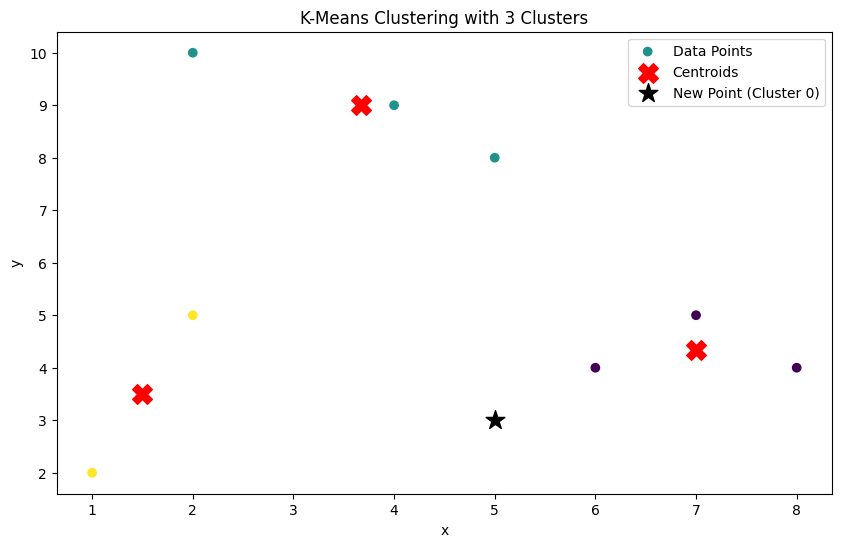

In [13]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset (replace 'your_file.csv' with your actual file name)
df = pd.read_csv('kmeans.csv')

# Select the columns you want to use for clustering (e.g., 'x' and 'y')
X = df[['x', 'y']]

# Apply K-Means with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X)

# Centroids
centroids = kmeans.cluster_centers_
print("Centroids:", centroids)

# Function to predict cluster for a new data point
def predict_cluster(new_x, new_y):
    new_point = np.array([[new_x, new_y]])
    cluster = kmeans.predict(new_point)[0]
    centroid = centroids[cluster]
    return cluster, centroid

# Example prediction
new_x, new_y = 5, 3  # Replace with your own values
predicted_cluster, predicted_centroid = predict_cluster(new_x, new_y)
print(f"The point ({new_x}, {new_y}) belongs to cluster {predicted_cluster} with centroid {predicted_centroid}")

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X['x'], X['y'], c=df['Cluster'], cmap='viridis', label='Data Points')
plt.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='X', s=200, label='Centroids')
plt.scatter(new_x, new_y, color='black', marker='*', s=200, label=f'New Point (Cluster {predicted_cluster})')
plt.xlabel('x')
plt.ylabel('y')
plt.title('K-Means Clustering with 3 Clusters')
plt.legend()
plt.show()